# MNIST - Keras

Build a shallow neural network to classify handwritten digits

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

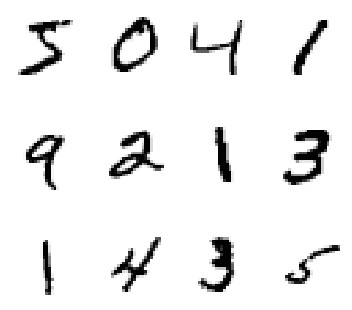

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

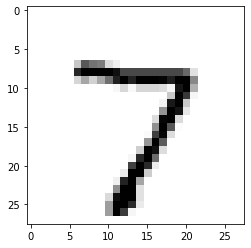

In [9]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 14s 15ms/step - loss: 0.0921 - accuracy: 0.1042 - val_loss: 0.0913 - val_accuracy: 0.0996
Epoch 2/200
469/469 [==============================] - 5s 11ms/step - loss: 0.0911 - accuracy: 0.1008 - val_loss: 0.0906 - val_accuracy: 0.0990
Epoch 3/200
469/469 [==============================] - 6s 12ms/step - loss: 0.0905 - accuracy: 0.1018 - val_loss: 0.0901 - val_accuracy: 0.1043
Epoch 4/200
469/469 [==============================] - 6s 12ms/step - loss: 0.0900 - accuracy: 0.1094 - val_loss: 0.0897 - val_accuracy: 0.1204
Epoch 5/200
469/469 [==============================] - 6s 12ms/step - loss: 0.0896 - accuracy: 0.1248 - val_loss: 0.0893 - val_accuracy: 0.1433
Epoch 6/200
469/469 [==============================] - 6s 12ms/step - loss: 0.0892 - accuracy: 0.1473 - val_loss: 0.0890 - val_accuracy: 0.1728
Epoch 7/200
469/469 [==============================] - 6s 12ms/step - loss: 0.0889 - accuracy: 0.1682 - val_loss: 0.0887 - val_accuracy

469/469 [==============================] - 7s 15ms/step - loss: 0.0452 - accuracy: 0.7531 - val_loss: 0.0444 - val_accuracy: 0.7607
Epoch 114/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0449 - accuracy: 0.7579 - val_loss: 0.0442 - val_accuracy: 0.7635
Epoch 115/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0448 - accuracy: 0.7556 - val_loss: 0.0439 - val_accuracy: 0.7654
Epoch 116/200
469/469 [==============================] - 8s 16ms/step - loss: 0.0443 - accuracy: 0.7615 - val_loss: 0.0436 - val_accuracy: 0.7670
Epoch 117/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0441 - accuracy: 0.7619 - val_loss: 0.0433 - val_accuracy: 0.7691
Epoch 118/200
469/469 [==============================] - 8s 16ms/step - loss: 0.0436 - accuracy: 0.7645 - val_loss: 0.0430 - val_accuracy: 0.7712
Epoch 119/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0437 - accuracy: 0.7653 - val_loss: 0.0427 - val_accuracy:

#### Evaluating model performance

In [24]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 7s 1ms/step - loss: 0.0276 - accuracy: 0.8681


[0.027578124776482582, 0.8680999875068665]

#### Performing inference

In [25]:
valid_0 = X_valid[0].reshape(1, 784)

In [26]:
model.predict(valid_0)

array([[7.3353751e-03, 2.0065373e-03, 1.9516856e-03, 8.5453847e-03,
        4.0194751e-03, 1.2308365e-02, 4.9226737e-04, 9.2276961e-01,
        3.0362690e-03, 3.7534982e-02]], dtype=float32)

In [27]:
model.predict_classes(valid_0)

C:\Users\archi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7], dtype=int64)